Importing the Libraries 

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

Importing the data

In [31]:
iris = pd.read_excel("Aggregation.xlsx")
x = iris.iloc[:, [0, 1]].values

target = iris.iloc[:,2].values



Viewing the Data

In [32]:
x

array([[14.9 , 27.55],
       [14.45, 28.35],
       [14.15, 28.8 ],
       ...,
       [ 8.5 ,  3.25],
       [ 8.1 ,  3.55],
       [ 8.15,  4.  ]])

Viewing the target

In [33]:
target

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

Ploting the data according to target 

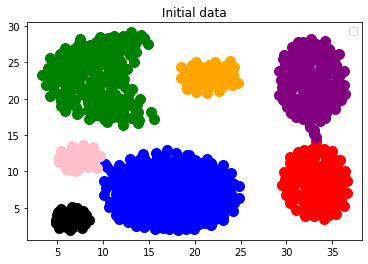

In [34]:
# plt.scatter(x[target == 0, 0], x[target == 0, 1], s = 100, c = 'purple')
plt.scatter(x[target == 1, 0], x[target == 1, 1], s = 100, c = 'orange')
plt.scatter(x[target == 2, 0], x[target == 2, 1], s = 100, c = 'green')
plt.scatter(x[target == 3, 0], x[target == 3, 1], s = 100, c = 'red')
plt.scatter(x[target == 4, 0], x[target == 4, 1], s = 100, c = 'blue')
plt.scatter(x[target == 5, 0], x[target == 5, 1], s = 100, c = 'black')
plt.scatter(x[target == 6, 0], x[target == 6, 1], s = 100, c = 'purple')
plt.scatter(x[target == 7, 0], x[target == 7, 1], s = 100, c = 'pink')
plt.title('Initial data')
#Plotting the centroids of the clusters


plt.legend()
plt.show()

FINDING THE BEST K BY ELBOW METHOD

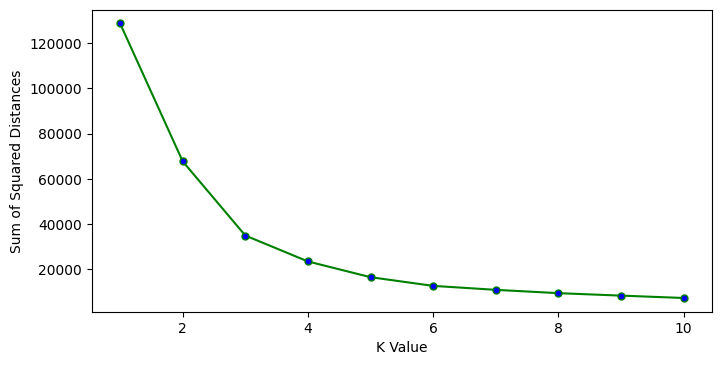

In [35]:
from sklearn.cluster import KMeans
ssd = [] # An empty list for sum of squared distances to be appended for k values 2 to 30
clusters = []
for k in range(1,11):
    model = KMeans(n_clusters=k)
    model.fit(x)
    ssd.append(model.inertia_)
    clusters.append(model)
plt.figure(figsize=(8,4),dpi=100)
plt.plot(range(1,11), ssd, marker='o', color='green', markerfacecolor='blue', markersize=5);
plt.xlabel("K Value");
plt.ylabel("Sum of Squared Distances");
  

WE CAN CLEARLY SEE THAT ELBOW IS AT 4 BUT STILL LETS CHECK THE SILHOUTTE SCORE

In [36]:
from sklearn.metrics import silhouette_score
for i in range(1,9,1):
    
    print("---------------------------------------")
    print(clusters[i])
    print("Silhouette score:",silhouette_score(x, clusters[i].predict(x)))

---------------------------------------
KMeans(n_clusters=2)
Silhouette score: 0.45655250803034875
---------------------------------------
KMeans(n_clusters=3)
Silhouette score: 0.5227710766652318
---------------------------------------
KMeans(n_clusters=4)
Silhouette score: 0.5236994327662386
---------------------------------------
KMeans(n_clusters=5)
Silhouette score: 0.4990804705425708
---------------------------------------
KMeans(n_clusters=6)
Silhouette score: 0.5104929779024204
---------------------------------------
KMeans(n_clusters=7)
Silhouette score: 0.4821144594204596
---------------------------------------
KMeans()
Silhouette score: 0.45315993037133023
---------------------------------------
KMeans(n_clusters=9)
Silhouette score: 0.4625549496428026


Applying  Kmeans 

In [37]:
kmeans = KMeans(n_clusters = 4, max_iter = 300, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

Viewing the the cluster formation

In [38]:
y_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2,
       2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

Ploting the clusturing result

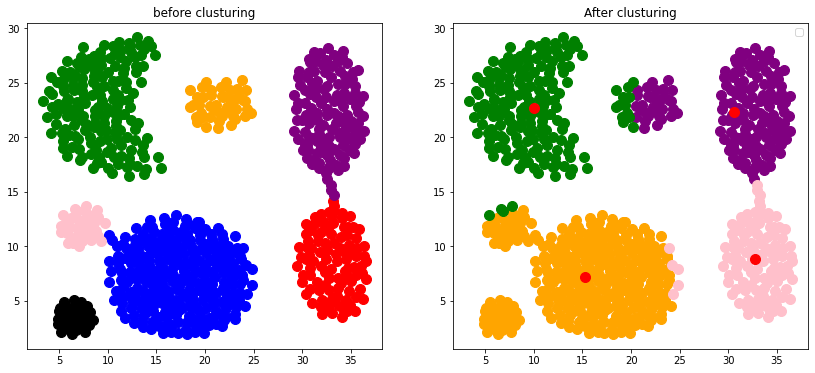

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))
axes[1].scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple')
axes[1].scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange')
axes[1].scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green')
axes[1].scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'pink')
axes[1].set_title('After clusturing')
#Plotting the centroids of the clusters
axes[1].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red' )
# axes[0].scatter(x[target == 0, 0], x[target == 0, 1], s = 100, c = 'purple')
axes[0].scatter(x[target == 1, 0], x[target == 1, 1], s = 100, c = 'orange')
axes[0].scatter(x[target == 2, 0], x[target == 2, 1], s = 100, c = 'green')
axes[0].scatter(x[target == 3, 0], x[target == 3, 1], s = 100, c = 'red')
axes[0].scatter(x[target == 4, 0], x[target == 4, 1], s = 100, c = 'blue')
axes[0].scatter(x[target == 5, 0], x[target == 5, 1], s = 100, c = 'black')
axes[0].scatter(x[target == 6, 0], x[target == 6, 1], s = 100, c = 'purple')
axes[0].scatter(x[target == 7, 0], x[target == 7, 1], s = 100, c = 'pink')
axes[0].set_title('before clusturing')
#Plotting the centroids of the clusters


plt.legend()
plt.show()

In [41]:
print(pd.crosstab(target,y_kmeans))

col_0    0    1    2    3
row_0                    
1       32    0   13    0
2        0    0  169    0
3        0    0    0  102
4        0  268    0    5
5        0   34    0    0
6      127    0    0    3
7        0   30    4    0
